# Kaggle MNIST

1.[Kaggle上MNIST各个方法效果分析](https://www.kaggle.com/competitions/digit-recognizer/discussion/61480)
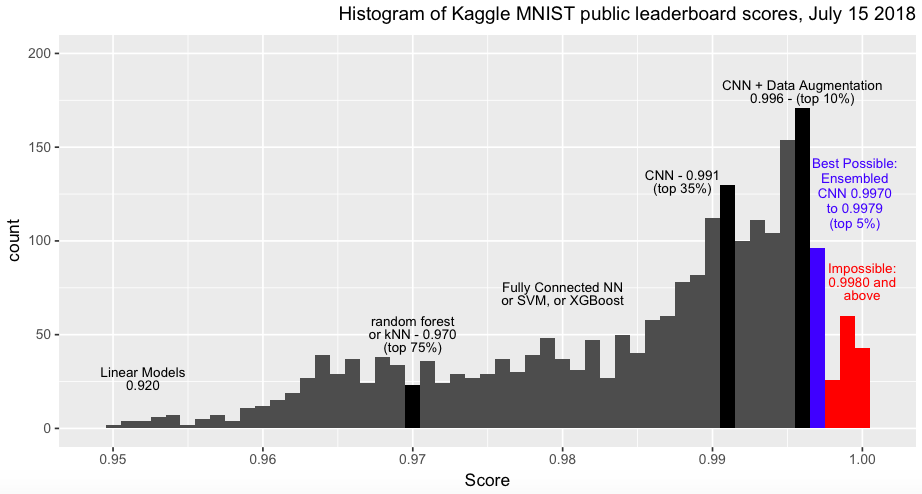
1.[Kaggle上CNN方案](https://www.kaggle.com/code/cdeotte/how-to-choose-cnn-architecture-mnist), 用了42000张trains.csv里的图片，同时通过数据增强生成了25million张图片。 tensorflow 15 CNNs, 达到了99.75%的准确度.

# 数据加载

有以下方法可以用于加载数据集:

1. 我们用sklearn上的数据集,`sklearn.datasets.load_digits()` , 1797张8x8的图片。
1. http://yann.lecun.com/exdb/mnist/, 70000 images split in 60k train and 10k test,28x28。
1. https://www.kaggle.com/competitions/digit-recognizer/data, Kaggle splits the same dataset into 42k train and 28k test。
1. sklearn.datasets.fetch_openml, load data from https://www.openml.org/d/554 
   ~~~python
    # load data from https://www.openml.org/d/554, 28*28=784
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
   ~~~

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


# SKlearn上相关的教程

1. [MNIST classification using multinomial logistic + L1](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html)
1. [Recognizing hand-written digits
](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)
1. [Feature agglomeration](https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_agglomeration.html#feature-agglomeration)
1. [Image denoising using kernel PCA](https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html#sphx-glr-auto-examples-applications-plot-digits-denoising-py)
1. [Label Propagation digits: Demonstrating performance](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-digits-py)
1. [A demo of K-Means clustering on the handwritten digits data](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)
1. [Label Propagation digits active learning](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits_active_learning.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-digits-active-learning-py)
1. [Restricted Boltzmann Machine features for digit classification](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py)
1. [Manifold learning on handwritten digits: Locally Linear Embedding, Isomap…](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)
                                                                    
                                                                    
                                                                    

# 显示图片和主成分分析
https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_digits_simple_classif.html

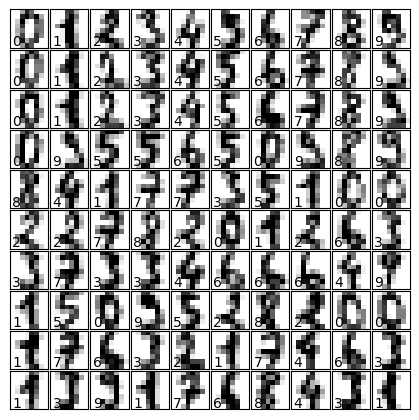

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 4))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

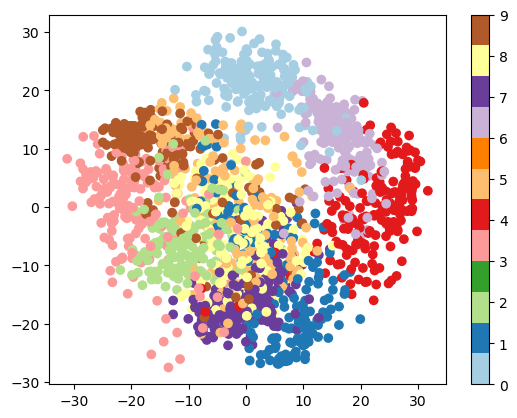

In [17]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(digits.data) # 算出来的是第1主成份，第2主成份..., 维数由上面的n_components决定。
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [27]:
proj# 挑选出来的features, 主成份

array([[ -1.25946669,  21.27488381,  -9.46306529],
       [  7.95761148, -20.76869942,   4.43950989],
       [  6.99192295,  -9.95598615,   2.95856576],
       ...,
       [ 10.80128394,  -6.96025055,   5.59954957],
       [ -4.87210132,  12.42395052, -10.17086706],
       [ -0.34438943,   6.36555048,  10.77370292]])

In [30]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
print('降维后的数据:',pca)
print('保留主成分的方差贡献率:',pca.explained_variance_ratio_)
print('所有样本的log似然平均值:',pca.score)
print('奇异值:',pca.singular_values_)
print('噪声协方差:',pca.noise_variance_)
print('返回具有最大方差的成分:',pca.components_[:, :2])

降维后的数据: PCA(n_components=3)
保留主成分的方差贡献率: [0.14890594 0.13618771 0.11794594]
所有样本的log似然平均值: <bound method PCA.score of PCA(n_components=3)>
奇异值: [567.0065665  542.25185421 504.63059421]
噪声协方差: 11.764501575226761
返回具有最大方差的成分: [[ 3.07601881e-19 -1.73094655e-02]
 [ 1.58096437e-17 -1.01064586e-02]
 [-1.98368798e-17  1.83420838e-02]]


In [1]:
28*28

784

In [2]:
a = [[1,2]]
s = sum(len(b) for b in a)

In [3]:
s

2